In [1]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


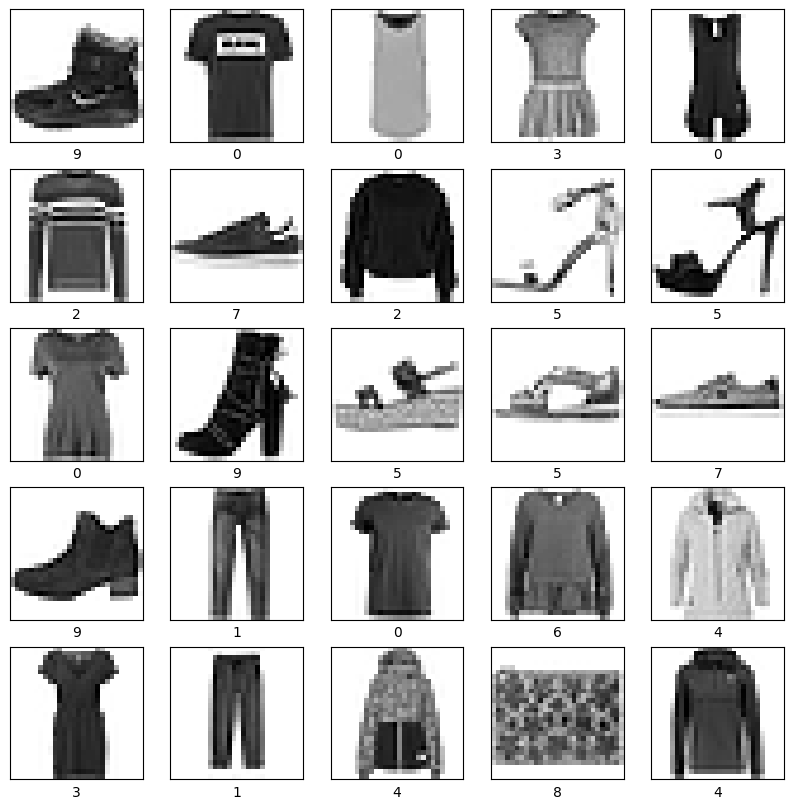

In [2]:
mnist = tensorflow.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train.reshape(-1, 28, 28, 1))

augmented_iterator = datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32)

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(str(y_train[i]))
plt.show()

In [3]:
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5033 - accuracy: 0.8204
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3792 - accuracy: 0.8618
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3415 - accuracy: 0.8748
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3206 - accuracy: 0.8815
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3002 - accuracy: 0.8887
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2872 - accuracy: 0.8929
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2782 - accuracy: 0.8955
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.8998
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2558 - accuracy: 0.9039
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [6]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(augmented_iterator, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.7762 - accuracy: 0.7060
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6242 - accuracy: 0.7621
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5795 - accuracy: 0.7824
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5546 - accuracy: 0.7892
Epoch 5/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5370 - accuracy: 0.7957
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5207 - accuracy: 0.8032
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5104 - accuracy: 0.8036
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4975 - accuracy: 0.8095
Epoch 9/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4908 - accuracy: 0.8142
Epoch 10/20
1875/1875 [==============================] - 26s 14m

313/313 [==============================] - 1s 2ms/step


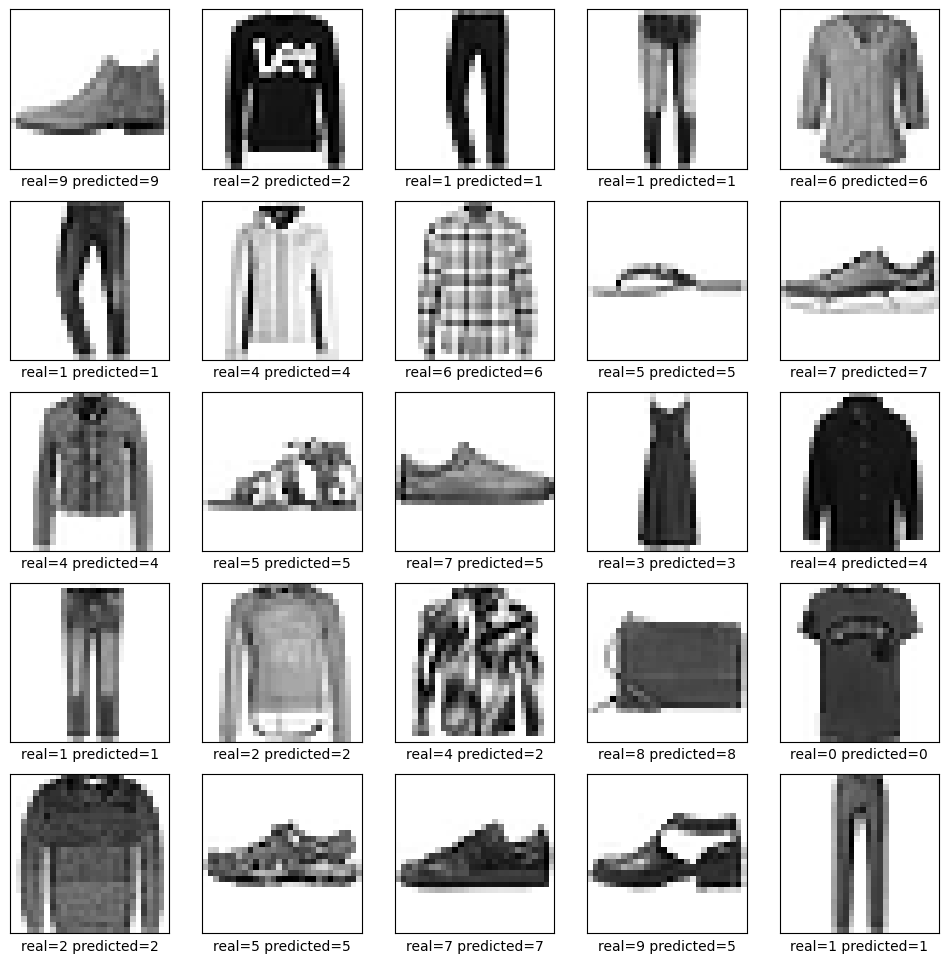

In [7]:
predict1 = model1.predict(x_test)
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel("real=" + str(y_test[i]) + ' predicted=' + str(np.argmax(predict1[i])))
plt.show()

313/313 [==============================] - 1s 1ms/step


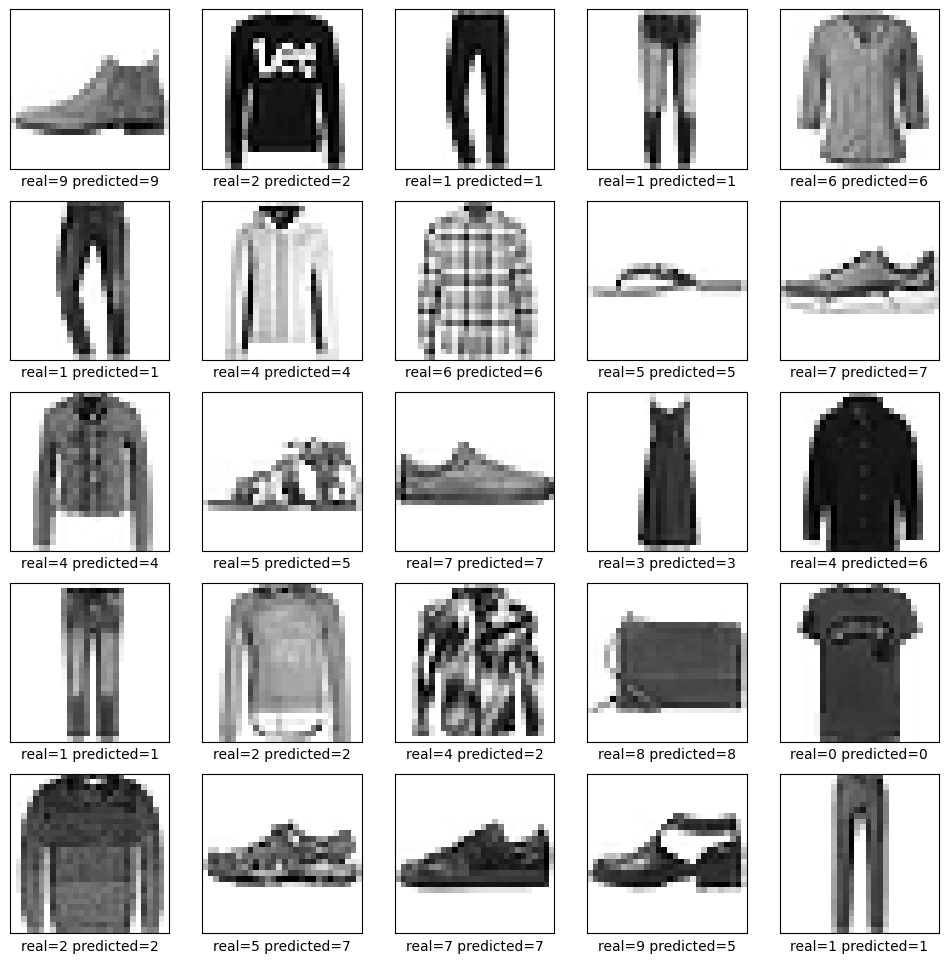

In [8]:
predict2 = model2.predict(x_test)
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel("real=" + str(y_test[i]) + ' predicted=' + str(np.argmax(predict2[i])))
plt.show()

In [9]:
out11 = model1.evaluate(x_test, y_test)

print("Model Accuracy: %.4f" % out11[1])
print("Model loss: %.4f" % out11[0])

out21 = model2.evaluate(x_test, y_test)

print("Model Accuracy: %.4f" % out21[1])
print("Model loss: %.4f" % out21[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8880
Model Accuracy: 0.8880
Model loss: 0.3526
313/313 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8502
Model Accuracy: 0.8502
Model loss: 0.3997


In [10]:
datagen.fit(x_test.reshape(-1, 28, 28, 1))

test_augmented = datagen.flow(x_test.reshape(-1, 28, 28, 1), y_test, batch_size=32)

out12 = model1.evaluate(test_augmented)

print("Model Accuracy: %.4f" % out12[1])
print("Model Loss: %.4f" % out12[0])

out21 = model2.evaluate(test_augmented)

print("Model Accuracy: %.4f" % out21[1])
print("Model Loss: %.4f" % out21[0])

313/313 [==============================] - 5s 15ms/step - loss: 1.8912 - accuracy: 0.6095
Model Accuracy: 0.6095
Model Loss: 1.8912
313/313 [==============================] - 4s 12ms/step - loss: 0.4784 - accuracy: 0.8229
Model Accuracy: 0.8229
Model Loss: 0.4784
